`conda install matplotlib`

In [2]:
import enum
import pickle
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd

#matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/reviews.csv')

In [8]:
df

,rating,review
0,50,This is one of the best hotels I've ever staye...
1,50,Everything about this hotel was awesome. The s...
2,50,Our tour group stayed here for two nights. Th...
3,50,Excellent service at Porta Hotel Antigua. From...
4,50,I almost always stay at Hotel Antigua when I t...
...,...,...
15677,40,Last week I stayed at the Camino Real in Antig...
15678,50,My boyfriend was in Guate on business and we d...
15679,40,I stayed at Camino Real Antigua for a conferen...
15680,50,"Was in Antigua for the weekend, attending an A..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  15682 non-null  int64 
 1   review  15682 non-null  object
dtypes: int64(1), object(1)
memory usage: 245.2+ KB


In [10]:
df['review']

0        This is one of the best hotels I've ever staye...
1        Everything about this hotel was awesome. The s...
2        Our tour group stayed here for two nights.  Th...
3        Excellent service at Porta Hotel Antigua. From...
4        I almost always stay at Hotel Antigua when I t...
                               ...                        
15677    Last week I stayed at the Camino Real in Antig...
15678    My boyfriend was in Guate on business and we d...
15679    I stayed at Camino Real Antigua for a conferen...
15680    Was in Antigua for the weekend, attending an A...
15681    very nice little hotel, brand new, with lots o...
Name: review, Length: 15682, dtype: object

In [8]:
df['rating'] = df['rating'].astype(dtype='int64')

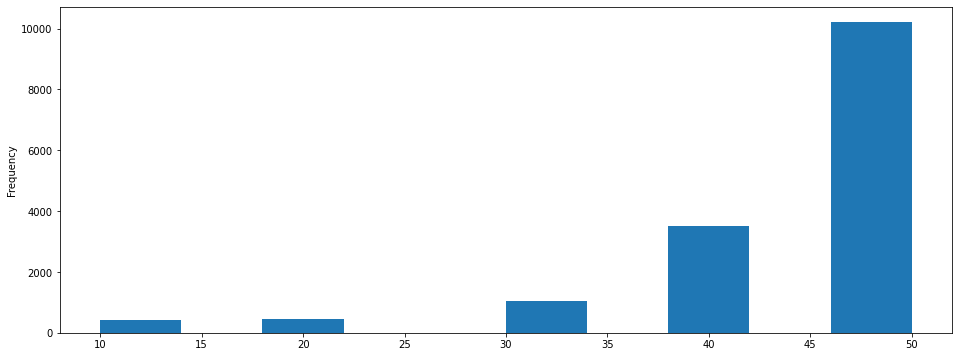

In [11]:
fig = plt.figure(figsize=(16,6))
df['rating'].plot.hist()

In [11]:
df.groupby('rating').count()

,review
rating,
10,428
20,456
30,1060
40,3525
50,10213


In [12]:
class Sentiments(enum.Enum):
    POS = 'POS'
    NEG = 'NEG'

In [13]:
df['sentiment'] = df['rating'].apply(lambda x: Sentiments.POS if x >= 40 else Sentiments.NEG)

In [14]:
df

,rating,review,sentiment
0,50,This is one of the best hotels I've ever staye...,Sentiments.POS
1,50,Everything about this hotel was awesome. The s...,Sentiments.POS
2,50,Our tour group stayed here for two nights. Th...,Sentiments.POS
3,50,Excellent service at Porta Hotel Antigua. From...,Sentiments.POS
4,50,I almost always stay at Hotel Antigua when I t...,Sentiments.POS
...,...,...,...
15677,40,Last week I stayed at the Camino Real in Antig...,Sentiments.POS
15678,50,My boyfriend was in Guate on business and we d...,Sentiments.POS
15679,40,I stayed at Camino Real Antigua for a conferen...,Sentiments.POS
15680,50,"Was in Antigua for the weekend, attending an A...",Sentiments.POS


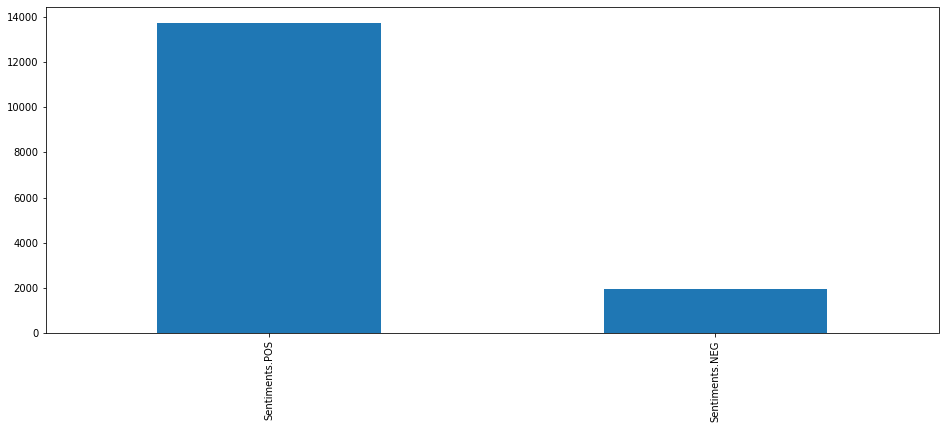

In [15]:
fig = plt.figure(figsize=(16,6))
df['sentiment'].value_counts().plot(kind='bar')

In [17]:
df['sentiment'].value_counts()

Sentiments.POS    13738
Sentiments.NEG     1944
Name: sentiment, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     15682 non-null  int64 
 1   review     15682 non-null  object
 2   sentiment  15682 non-null  object
dtypes: int64(1), object(2)
memory usage: 367.7+ KB


In [18]:
data_classes = {sentiment.value: df[df['sentiment'] == sentiment]['review'].values.tolist() for sentiment in Sentiments}

In [21]:
pprint(data_classes['NEG'])

['Good location on the NW of town, especially if youre going to Antiguena '
 'spanish school. 100q for good sized private twin room with shared bathroom - '
 'great price Nice ish garden with a swing and hamock Basic bathrooms - very '
 'tatty but has hot showers always (if you keep the water flow slow) Super '
 'basic, pretty dirty kitchenette Loads of cats and dogs  Its very cheap and '
 'basic. If thats what your after, its ok',
 'We went to the hotel directly to book a room. The receptionist at first gave '
 'us a really high price then lowered it. When we asked how much it costs in '
 'qetales she gave us an 8.2 comission rate to dollars and I knew she was '
 'randomly goving us a non existing rate so then she "lowered" it to the real '
 'rate. After we agreed that the price includes breakfast the following '
 'morning we get to breakfast and received two plain pieces of toast and fruit '
 'while theother tables received also eggs and plantines. So I asked if we '
 'also get eggs 

 "wasn't used that weekend.  The hotel is very far from the",
 'They tell you that it is a centric location when it actually is very far '
 'away and lonely from central park. You walk 3 blocks to get to the parking '
 'lot which costs around $10.00 more aside from hotel fee. Cuatomer service is '
 'horrible, from the moment you get there till you leave. Rooms are small, '
 "humid and smelly. Food is not great either. It's the first time I stay "
 "there, and for what I paid, I could've stayed at a 4 stars hotel. Also, bugs "
 'everywhere!!! Terrible experience.',
 'The staff is the main asset of the hotel. Anything else is over stated and '
 'priced. It is located at the end of a street, at the edge of the city '
 'center, making the back and forth from the center not so enjoyable (polution '
 'from cars and busses and uneaven pavement). Breakfast is poor. Very noisy '
 'from cars and other guests. Internet signal is good, but only near '
 'reception. Shower is OK but water gets cold 

 'important to our words when we told them that we would give them a bad '
 'review due to all of the above and to the fact that they charged us 28% more '
 "than the initial amount advertised on booking.  We don't know if this was "
 'booking´s fault or their own, but we felt disappointed, neglected and '
 'uncomfortable.  With the great',
 'We stayed two nights in an upstairs double room that was fine.  Rooms are '
 'situated around a lovely courtyard.  There is a rooftop patio with nice '
 'views of the surrounding volcanoes.  Good shower.  Did not include breakfast '
 'but there are good places to eat close by.  Can arrange shuttles to and from '
 'the airport. Wifi is spotty. They let you know in advance that they do not '
 'accept credit cards.  No problem with that.  However, when you pay in soles, '
 'they calculate the bill using 8 quetzales per dollar instead of the going '
 'rate of 7.5.  Not a big difference, but slightly irritating,',
 'A beautiful hotel in many ways but t

 'There are only two toilets and since they also are also showers, it was '
 'IMPOSSIBLE to get in there in the morning.  All the guys were peeing in '
 'water bottles because of the insanely long waits in the morning.  Other than '
 'that, this place is really not very clean.  I really wanted to like it here '
 'because the staff were extremely friendly and helpful (and the showers were '
 'hot!) but we still had to switch hostels after a couple days because of how '
 'gross the place was and because of the bathroom situation.  Oh - and one of '
 'the girls in the dorm had her laptop stolen.',
 'Great location near the bus stop and Market, comfortable dorm beds with '
 'included breakfast (@85Q) which is quite quite and also a guest kitchen.  '
 'BUT the reasons you may not want to stay are mainly curfew between 12-07:00 '
 "and they will not let you out even to catch a shuttle if you didn't book "
 'that shuttle through them (not letting you out one of the many rules on the '
 "notic

 '(and speak English). And the room was as booked, a quad with two doubles and '
 'two singles that were up a long ladder in a high loft. Nice and clean, '
 'too.   However, there some real challenges here. Foremost is that the sound '
 'insulation/dampening between rooms is practically non-existent.  We could '
 'hear the boy in the room on one side coughing all night, and every word '
 'spoken by the man with the deep voice on the other. Add to the the '
 'techno-beat bass from a nearby club until quite late and the '
 'symphony/cacophony from the flock of birds that live in the garden that '
 'started',
 'For that price for a privateroom with a shared bathroom the hostel does not '
 'provide enough service! The Toiletts are unclean and the windowless rooms '
 'have uncomfotable matress.  There is no place to sit and hang out other than '
 'the tables from the bar above, so it`s not allowed to eat your own food '
 'there.  Also (and I am sorry to have to say that) the staff is kind o

 'against their wall. Luckily they seemed to stop around 10:30-11:00. The '
 'first night they kept us up till 11 and the second',
 'We (couple, 40 & 50 years old) stayed at Terrace Hostel in November 2013.  '
 'Our room was a good value.  It was small but clean.  The private bathroom '
 'was also clean; however there was a small opening between the bathroom and '
 'the hallway high up on the wall.  There is a bar on the roof that was noisy, '
 'but staff shut it down at 11:00 PM and the hostel was quiet all night.  The '
 'staff insisted on holding our passports to ensure payment even though we '
 'paid cash in advance.  They claimed “everyone does it” but we have never '
 'encounter this practice. This would be a good place for young travelers '
 'looking to socialize and party.',
 'Noise in this place is just crazy. Church bells ring every half hour, the '
 'hotel loudspeaker play mariachi on full volume until 10pm and at 5pm traffic '
 'outside definitely picks up. After 3 nights w

 'If you want a decent nights sleep, a clean bathroom and a comfy bed this '
 'hostel isnt for you... it felt like sleeping in a cloakroom of an awful '
 'club. The staff on the front desk were over friendly but it felt to be '
 'honest quite fake, as well as this when directed to the room we were given '
 'no instructions about how their bed system worked and the whole expirience '
 'felt like a money making scheme as opposed to the wholesome expirience we '
 'had at both maya papaya or el hostal. ',
 'This hotel is basic but centrally located to great places to eat and only 2 '
 'blocks to the central plaza. The staff are most obliging and will do '
 'anything to help you. Breakfast is cereal and toast but the kitchen staff '
 'will happily cook you an omelet or prepare you eggs anyway you want them.   '
 'Because it is in an old convent the walls are thick plaster and the ceiling '
 'is very high. The plaster could do with a new coat of paint but the bed was '
 'very comfortable. Th

 'the exit first time, so some additional signage would probably help.  I also '
 'got some incorrect information from the hotel in advance of arriving about '
 'tours to Lake Atitlan that meant I missed out completely on getting out to '
 'that area.  This was compensated for by visiting the nearby coffee estate '
 'tour that was really interesting and good',
 'I had booked 2 nights at this hotel several months in advance and got a '
 'reasonable rate.  When I went back online to add an additional night, it was '
 'double the price and the date was still 2-3 weeks away.  I found it ironic '
 'because I think I was one of three rooms that were occupied (off-season).    '
 'I saw other comments about hot stuffy rooms.  True! HOWEVER, they must have '
 'taken that feedback into account.  I had a fan delivered to my room without '
 'even having to ask for it.',
 'This hotel has an odd combination of really nice features and some other '
 'not-so-nice features.  Pros: The location is outst

 'I want to give this resort a 4 or 5, but after spending the entire night up '
 'on my last night of my stay due to very loud, blaring music that lasted all '
 'night. I left for the airport at 4:30am and the music was still cranked up '
 'and blasting. There was no one available to complain to about the music '
 'during the night, so there was nothing I could do about it. The music was '
 "not coming from any of the guests rooms so I didn't feel comfortable "
 'wondering the grounds by myself at 2 or 3 in the morning. I believe the '
 'source of the music was coming from one of the staff buildings off the side '
 'of the hotel. I came to the resort to relax and get some rest, but I left '
 'exhausted and pissed. I saw other people complain about the noise level in '
 'their reviews maybe this should be looked into',
 'Visited restaurant, did not stay at the hotel. A beautiful classic Antigua '
 'courtyard with fountains and flowering plants galore. The restaurant was '
 'super busy a

 'helpful and kind. We recently stayed here two nights. Our first night we had '
 'very loud people staying in one of the nearby rooms.. and also a party going '
 'on next door. The owner commented on the party and said that was not '
 "something that goes on all of the time. I believe her as I didn't even "
 'mention it to her and she brought it up.The second night we stayed guests '
 'were up in the middle of the night to catch a ride to Copan.. again probably '
 "something that doesn't happen all of the time. I think we just were unlucky. "
 'I think I would probably risk it and stay there again... and hope for quiet '
 'guests. The location is good and the hotel itself is clean. They allowed us '
 'to store our suitcases for a night',
 'For Guatemala, this is a nice beautiful hotel. The pool was nice, the room '
 'was clean, and I enjoyed taking a hot bath. Issue 1: RUDE/ UNPROFESSIONAL '
 'front desk. I got a deal of the day on hotels.com and they did not want to '
 'accept my res

 'what we owed because someone had charged 5 breakfasts to our room (Although '
 'we were two guests and had the receipt where we paid cash for our '
 'breakfast).  It really is a shame because the property is very nice and the '
 'rooms are comfortable.  Unfortunately, they should',
 'I will never stay at this hotel again. I am currently working with my '
 'banking institution on bogus charges made to my credit card. I was offered '
 'one rate and then charged twice the amount. Further, there are other charges '
 'that I have not authorized. When I checked my family in for two nights, I '
 'payed about $260, but the receptionist was originally charging over $420. '
 'This is simply unacceptable. As a result, I have shut down my credit card. '
 'This was supposed to be vacation and has turned into a mess because the '
 "reception area didn't have trained people.   Please don't stay here, unless "
 "you don't care about your money. Another thing is that if you want to use "
 'the pool o

In [22]:
with open(r"../data/interim/review_classes.pkl", "wb") as output_file:
    pickle.dump(data_classes, output_file)

In [26]:
data_classes['NEG']

['Good location on the NW of town, especially if youre going to Antiguena spanish school. 100q for good sized private twin room with shared bathroom - great price Nice ish garden with a swing and hamock Basic bathrooms - very tatty but has hot showers always (if you keep the water flow slow) Super basic, pretty dirty kitchenette Loads of cats and dogs  Its very cheap and basic. If thats what your after, its ok',
 'We went to the hotel directly to book a room. The receptionist at first gave us a really high price then lowered it. When we asked how much it costs in qetales she gave us an 8.2 comission rate to dollars and I knew she was randomly goving us a non existing rate so then she "lowered" it to the real rate. After we agreed that the price includes breakfast the following morning we get to breakfast and received two plain pieces of toast and fruit while theother tables received also eggs and plantines. So I asked if we also get eggs abd plantines and she replied "no". How come we 

$$f_1 = \frac{2 R P}{R + P}$$

0 100

100 0